In [1]:
#Importing all the required libraries.

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import requests
!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.colors as colors
from sklearn.cluster import KMeans

Solving environment: done

## Package Plan ##

  environment location: /opt/conda/envs/Python36

  added / updated specs: 
    - folium=0.5.0


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2020.6.20  |       hecda079_0         145 KB  conda-forge
    certifi-2020.6.20          |   py36h9f0ad1d_0         151 KB  conda-forge
    python_abi-3.6             |          1_cp36m           4 KB  conda-forge
    openssl-1.1.1g             |       h516909a_1         2.1 MB  conda-forge
    vincent-0.4.4              |             py_1          28 KB  conda-forge
    altair-4.1.0               |             py_1         614 KB  conda-forge
    folium-0.5.0               |             py_0          45 KB  conda-forge
    branca-0.4.1               |             py_0          26 KB  conda-forge
    ------------------------------------------------------------
                       

In [2]:

import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_379c896284434c9690763cf21f43fc50 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='Ch_C_V4Hj3LjuHPQeha1_6jzNWno0Avf7K55MWvs1SvU',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_379c896284434c9690763cf21f43fc50.get_object(Bucket='capstonefinalproject-donotdelete-pr-fdhfxfei9em0br',Key='Dataset_Complete.xlsx')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df = pd.read_excel(body)
df.head(10)


,Borough,Neighborhoods,Area,Latitude,Longitude,Population,City,AverageIncome
0,Western,Amboli,"Andheri,Western Suburbs",19.129300,72.843400,348903.618242,Mumbai,18944.099792
1,Western,"Chakala, Andheri",Western Suburbs,19.111388,72.860833,299292.668696,Mumbai,56837.022198
2,Western,D.N. Nagar,"Andheri,Western Suburbs",19.124085,72.831373,191003.625665,Mumbai,41991.817435
3,Western,Four Bungalows,"Andheri,Western Suburbs",19.124714,72.827210,212583.146339,Mumbai,6667.447632
4,Western,Lokhandwala,"Andheri,Western Suburbs",19.130815,72.829270,359878.426443,Mumbai,53270.063892
5,Western,Marol,"Andheri,Western Suburbs",19.119219,72.882743,294384.772485,Mumbai,50712.430215
6,Western,Sahar,"Andheri,Western Suburbs",19.098889,72.867222,395209.882771,Mumbai,60967.535874
7,Western,Seven Bungalows,"Andheri,Western Suburbs",19.129052,72.817018,266849.489353,Mumbai,59943.541564
8,Western,Versova,"Andheri,Western Suburbs",19.120000,72.820000,159822.557319,Mumbai,58407.090338
9,Western,Mira Road,"Mira-Bhayandar,Western Suburbs",19.284167,72.871111,31345.779066,Mumbai,55850.962099


### We will create seperate dataframe table for Population & Income

In [3]:
mumbai_population = pd.DataFrame(df[['Borough','Neighborhoods','Population']])

In [4]:
mumbai_population.head()

,Borough,Neighborhoods,Population
0,Western,Amboli,348903.618242
1,Western,"Chakala, Andheri",299292.668696
2,Western,D.N. Nagar,191003.625665
3,Western,Four Bungalows,212583.146339
4,Western,Lokhandwala,359878.426443


In [5]:
mumbai_income = pd.DataFrame(df[['Borough','Neighborhoods','AverageIncome']])

In [6]:
mumbai_income.head()

,Borough,Neighborhoods,AverageIncome
0,Western,Amboli,18944.099792
1,Western,"Chakala, Andheri",56837.022198
2,Western,D.N. Nagar,41991.817435
3,Western,Four Bungalows,6667.447632
4,Western,Lokhandwala,53270.063892


In [7]:
mumbai_latitude = df['Latitude'].mean()
mumbai_longitude = df['Longitude'].mean()
print("Latitude and Longitude of Bangalore are : ",mumbai_latitude,mumbai_longitude)

Latitude and Longitude of Bangalore are :  19.036793591397853 72.29034151612903


In [8]:
CLIENT_ID = 'B0KGNTZGE4H2YF1I4SVOH1VOLUJTEUUP4TDW04X3ZXQSALCQ'
CLIENT_SECRET = 'O20I2S0IZFDM4CZKO3MBGCWUJURKNLKSXMSQ50ER005VPA2R'
VERSION = '20200727'
LIMIT = 150

In [9]:
unique_boroughs_of_mumbai = df['Borough'].unique().tolist()

In [10]:
unique_boroughs_of_mumbai

['Western', 'Eastern', 'Central', 'Southern']

In [11]:
borough_colors ={}
for i in unique_boroughs_of_mumbai:
    borough_colors[i] = '#%02X%02X%02X' % tuple(np.random.choice(range(256),size=3))

In [12]:
borough_colors

{'Western': '#6C78A1',
 'Eastern': '#DAB09F',
 'Central': '#19870A',
 'Southern': '#CD476D'}

In [13]:
mumbai_map= folium.Map(location=[mumbai_latitude,mumbai_longitude],zoom_start=12,control_scale=True)

In [14]:
for lat,lng,boro,nei in zip(df['Latitude'],
                           df['Longitude'],
                           df['Borough'],
                           df['Neighborhoods']):
    label_text = boro + ' - ' + nei
    label = folium.Popup(label_text,parse_html=True)
    folium.CircleMarker(
    [lat,lng],
    tooltip = label_text,
    radius = 4,
    popup = label,
    color=borough_colors[boro],
    fill=True,
    fill_color = borough_colors[boro],
    fill_opacity=0.7).add_to(mumbai_map)

In [15]:
mumbai_map

### Exploreing Neighborhood of Mumbai using Foursquare API

In [16]:
def getNearbyVenues(names, boro, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, boro, lat, lng in zip(names, boro, latitudes, longitudes):
        print("Fetching venues for : ",name)            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            boro,
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood',
                             'Borough',
                             'Neighborhood Latitude', 
                             'Neighborhood Longitude', 
                             'Venue', 
                             'Venue Latitude', 
                             'Venue Longitude', 
                             'Venue Category']
    
    return(nearby_venues)

In [17]:
mumbai_venues = getNearbyVenues(names=df['Neighborhoods'],latitudes=df['Latitude'],longitudes=df['Longitude'],boro=df['Borough'])

Fetching venues for :  Amboli
Fetching venues for :  Chakala, Andheri
Fetching venues for :  D.N. Nagar
Fetching venues for :  Four Bungalows
Fetching venues for :  Lokhandwala
Fetching venues for :  Marol
Fetching venues for :  Sahar
Fetching venues for :  Seven Bungalows
Fetching venues for :  Versova
Fetching venues for :  Mira Road
Fetching venues for :  Bhayandar
Fetching venues for :  Uttan
Fetching venues for :  Bandstand Promenade
Fetching venues for :  Kherwadi
Fetching venues for :  Pali Hill
Fetching venues for :  I.C. Colony
Fetching venues for :  Gorai
Fetching venues for :  Dahisa
Fetching venues for :  Aarey Milk Colony
Fetching venues for :  Bangur Nagar
Fetching venues for :  Jogeshwari West
Fetching venues for :  Juhu
Fetching venues for :  Charkop
Fetching venues for :  Poisar
Fetching venues for :  Mahavir Nagar
Fetching venues for :  Thakur village
Fetching venues for :  Pali Naka
Fetching venues for :  Khar Danda
Fetching venues for :  Dindoshi
Fetching venues for

In [18]:
print("Total number of venues found in Mumbai are : ",mumbai_venues.shape[0])

Total number of venues found in Mumbai are :  1333


In [19]:
mumbai_venues.head(10)

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Amboli,Western,19.1293,72.8434,Cafe Arfa,19.128930,72.847140,Indian Restaurant
1,Amboli,Western,19.1293,72.8434,"5 Spice , Bandra",19.130421,72.847206,Chinese Restaurant
2,Amboli,Western,19.1293,72.8434,Subway,19.127860,72.844461,Sandwich Place
3,Amboli,Western,19.1293,72.8434,Cafe Coffee Day,19.127748,72.844663,Coffee Shop
4,Amboli,Western,19.1293,72.8434,Spices & Chillies,19.127765,72.844131,Asian Restaurant
5,Amboli,Western,19.1293,72.8434,V33,19.129068,72.843670,Gym
6,Amboli,Western,19.1293,72.8434,Gelato Italiano,19.128120,72.844154,Ice Cream Shop
7,Amboli,Western,19.1293,72.8434,Delhi Zaika,19.132159,72.844406,Halal Restaurant
8,Amboli,Western,19.1293,72.8434,Bhardawadi Ground,19.126143,72.843548,Park
9,Amboli,Western,19.1293,72.8434,Nukkad Food Bistro,19.126058,72.846618,Fast Food Restaurant


In [20]:
mumbai_venues.groupby('Venue Category').count()['Neighborhood'].sort_values(ascending=False).head(10)

Venue Category
Indian Restaurant       176
Café                     84
Fast Food Restaurant     53
Coffee Shop              51
Bar                      43
Bakery                   42
Ice Cream Shop           41
Chinese Restaurant       39
Pizza Place              36
Restaurant               30
Name: Neighborhood, dtype: int64

In [21]:
print("Total number of unique categories in mumbai are : ",len(mumbai_venues['Venue Category'].unique()))

Total number of unique categories in mumbai are :  170


In [22]:
individual_mumbai_venue_count = mumbai_venues.groupby(['Borough','Neighborhood'])['Borough'].count().to_frame()

In [23]:
individual_mumbai_venue_count

Borough
Borough  Neighborhood                                         
Central  Chembur                                            14
         Deonar                                              9
         Dharavi                                             5
         Mankhurd                                            4
         Thane                                               7
Eastern  Amrut Nagar                                        39
         Asalfa                                              2
         Bhandup                                            10
         Chandivali                                         13
         Hiranandani Gardens                                55
         Indian Institute of Technology Bombay campus        6
         Kanjurmarg                                          2
         Nahur                                               4
         Pant Nagar                                         16
         Vidyavihar                                          5
Southern Agripada                                            5
         Altamount Road                                      8
         Ballard Estate                                      6
         Bhuleshwar                                         15
         Breach Candy                                       36
         C.G.S. colony                                       4
         Carmichael Road                                    19
         Cavel                                              16
         Chira Bazaar                                        5
         Chor Bazaar                                        10
         Churchgate                                         35
         Cotton Green                                        5
         Cuffe Parade                                        1
         Cumbala Hill                                       34
         Currey Road                                         5
...                                                        ...
Western  Chakala, Andheri                                   18
         Charkop                                             4
         D.N. Nagar                                          8
         Dahisa                                              6
         Dindoshi                                           10
         Four Bungalows                                     16
         Gorai                                               6
         I.C. Colony                                        14
         Irla                                               14
         Jogeshwari West                                    17
         Juhu                                               34
         Kalina                                             19
         Khar Danda                                         26
         Kherwadi                                           44
         Lokhandwala                                        16
         Mahavir Nagar                                      15
         Marol                                              17
         Mira Road                                           4
         Naigaon                                             3
         Nalasopara                                          3
         Pali Hill                                          48
         Pali Naka                                          35
         Poisar                                              5
         Seven Bungalows                                    38
         Sunder Nagar                                       17
         Thakur village                                     31
         Uttan                                               6
         Versova                                             2
         Vile Parle                                         34
         Virar                                               1

[86 rows x 1 columns]

In [24]:
individual_mumbai_venue_count.rename(columns={'Borough':'NumberOfVenues'},inplace=True)

In [25]:
individual_mumbai_venue_count.reset_index(inplace=True)

In [26]:
individual_mumbai_venue_count

,Borough,Neighborhood,NumberOfVenues
0,Central,Chembur,14
1,Central,Deonar,9
2,Central,Dharavi,5
3,Central,Mankhurd,4
4,Central,Thane,7
5,Eastern,Amrut Nagar,39
6,Eastern,Asalfa,2
7,Eastern,Bhandup,10
8,Eastern,Chandivali,13
9,Eastern,Hiranandani Gardens,55


[Text(0, 0, 'Chembur'),
 Text(0, 0, 'Deonar'),
 Text(0, 0, 'Dharavi'),
 Text(0, 0, 'Mankhurd'),
 Text(0, 0, 'Thane'),
 Text(0, 0, 'Amrut Nagar'),
 Text(0, 0, 'Asalfa'),
 Text(0, 0, 'Bhandup'),
 Text(0, 0, 'Chandivali'),
 Text(0, 0, 'Hiranandani Gardens'),
 Text(0, 0, 'Indian Institute of Technology Bombay\xa0campus'),
 Text(0, 0, 'Kanjurmarg'),
 Text(0, 0, 'Nahur'),
 Text(0, 0, 'Pant Nagar'),
 Text(0, 0, 'Vidyavihar'),
 Text(0, 0, 'Agripada'),
 Text(0, 0, 'Altamount Road'),
 Text(0, 0, 'Ballard Estate'),
 Text(0, 0, 'Bhuleshwar'),
 Text(0, 0, 'Breach Candy'),
 Text(0, 0, 'C.G.S. colony'),
 Text(0, 0, 'Carmichael Road'),
 Text(0, 0, 'Cavel'),
 Text(0, 0, 'Chira Bazaar'),
 Text(0, 0, 'Chor Bazaar'),
 Text(0, 0, 'Churchgate'),
 Text(0, 0, 'Cotton Green'),
 Text(0, 0, 'Cuffe Parade'),
 Text(0, 0, 'Cumbala Hill'),
 Text(0, 0, 'Currey Road'),
 Text(0, 0, 'Dagdi Chawl'),
 Text(0, 0, 'Dava Bazaar'),
 Text(0, 0, 'Dhobitalao'),
 Text(0, 0, 'Dongri'),
 Text(0, 0, 'Fanas Wadi'),
 Text(0, 0, 'Gowal

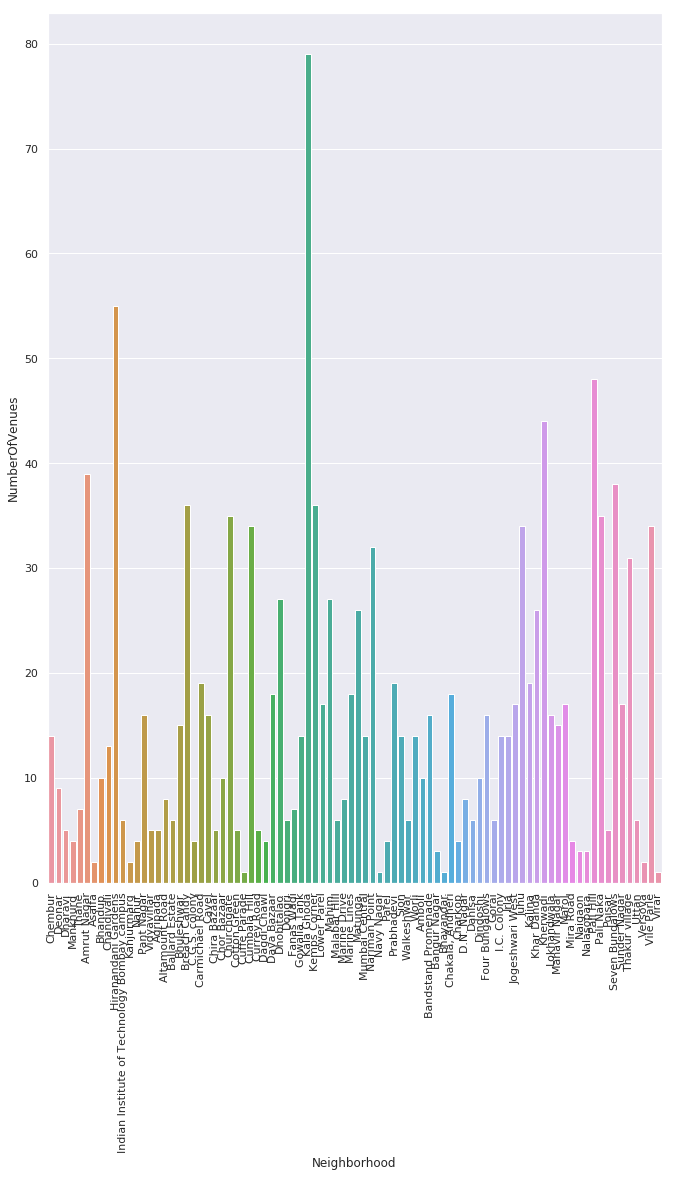

In [27]:
sns.set(rc={'figure.figsize':(11,16)})
plot = sns.barplot(x='Neighborhood',y='NumberOfVenues',data=individual_mumbai_venue_count)
plot.set_xticklabels(individual_mumbai_venue_count['Neighborhood'],rotation=90)

##Exploring Whitefield venues

In [28]:
mumbai_venues[mumbai_venues['Neighborhood']=='Whitefield']

,Neighborhood,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


# One hot encoding for letting us to compare different venues based on some common scale

In [29]:
mumbai_venues_onehot = pd.get_dummies(mumbai_venues[['Venue Category']])

In [30]:
mumbai_venues_onehot

,Venue Category_ATM,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Amphitheater,Venue Category_Antique Shop,Venue Category_Arcade,Venue Category_Art Gallery,Venue Category_Arts & Crafts Store,Venue Category_Arts & Entertainment,Venue Category_Asian Restaurant,...,Venue Category_Theater,Venue Category_Tourist Information Center,Venue Category_Trail,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
mumbai_venues_onehot['Neighborhood'] = mumbai_venues['Neighborhood']
mumbai_venues_grouped = mumbai_venues_onehot.groupby('Neighborhood').mean().reset_index()
mumbai_venues_grouped

,Neighborhood,Venue Category_ATM,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Amphitheater,Venue Category_Antique Shop,Venue Category_Arcade,Venue Category_Art Gallery,Venue Category_Arts & Crafts Store,Venue Category_Arts & Entertainment,...,Venue Category_Theater,Venue Category_Tourist Information Center,Venue Category_Trail,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Agripada,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
1,Altamount Road,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000,...,0.125000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
2,Amboli,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
3,Amrut Nagar,0.00,0.025641,0.025641,0.0,0.0,0.000000,0.0,0.000000,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
4,Asalfa,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
5,Ballard Estate,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
6,Bandstand Promenade,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
7,Bangur Nagar,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000
8,Bhandup,0.00,0.000000,0.000000,0.0,0.0,0.100000,0.0,0.000000,0.000,...,0.000000,0.0,0.0,0.000000,0.100000,0.00,0.000000,0.000000,0.000000,0.000000
9,Bhayandar,0.00,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000,...,0.000000,0.0,0.0,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000


In [32]:
number_of_top_venues = 5

In [33]:
for hood in mumbai_venues_grouped['Neighborhood']:
    print('---------',hood,'---------')
    temp = mumbai_venues_grouped[mumbai_venues_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(number_of_top_venues))
    print('\n')

--------- Agripada ---------
                              Venue  Frequency
0             Venue Category_Bakery        0.4
1  Venue Category_Indian Restaurant        0.2
2                Venue Category_Gym        0.2
3        Venue Category_Coffee Shop        0.2
4                Venue Category_ATM        0.0


--------- Altamount Road ---------
                           Venue  Frequency
0            Venue Category_Café       0.25
1     Venue Category_Pizza Place       0.12
2     Venue Category_Coffee Shop       0.12
3  Venue Category_Sandwich Place       0.12
4         Venue Category_Theater       0.12


--------- Amboli ---------
                               Venue  Frequency
0         Venue Category_Coffee Shop        0.1
1  Venue Category_Chinese Restaurant        0.1
2      Venue Category_Ice Cream Shop        0.1
3                Venue Category_Park        0.1
4   Venue Category_Indian Restaurant        0.1


--------- Amrut Nagar ---------
                                 Venu

--------- Dahisa ---------
                              Venue  Frequency
0        Venue Category_Pizza Place       0.17
1                Venue Category_Bar       0.17
2  Venue Category_Indian Restaurant       0.17
3      Venue Category_Train Station       0.17
4               Venue Category_Café       0.17


--------- Dava Bazaar ---------
                                Venue  Frequency
0    Venue Category_Indian Restaurant       0.28
1                  Venue Category_Bar       0.06
2           Venue Category_Restaurant       0.06
3  Venue Category_American Restaurant       0.06
4       Venue Category_Ice Cream Shop       0.06


--------- Deonar ---------
                                  Venue  Frequency
0             Venue Category_Smoke Shop       0.11
1  Venue Category_General Entertainment       0.11
2      Venue Category_Indian Restaurant       0.11
3                   Venue Category_Pool       0.11
4            Venue Category_Coffee Shop       0.11


--------- Dharavi --------

                                 Venue  Frequency
0            Venue Category_Lighthouse       0.17
1        Venue Category_Ice Cream Shop       0.17
2  Venue Category_Fast Food Restaurant       0.17
3     Venue Category_Indian Restaurant       0.17
4           Venue Category_Coffee Shop       0.17


--------- Mankhurd ---------
                          Venue  Frequency
0            Venue Category_ATM       0.25
1    Venue Category_Coffee Shop       0.25
2     Venue Category_Sports Bar       0.25
3  Venue Category_Train Station       0.25
4    Venue Category_Music Store       0.00


--------- Marine Drive ---------
                              Venue  Frequency
0             Venue Category_Bakery       0.12
1        Venue Category_Bridal Shop       0.12
2  Venue Category_Indian Restaurant       0.12
3     Venue Category_Scenic Lookout       0.12
4      Venue Category_Train Station       0.12


--------- Marine Lines ---------
                              Venue  Frequency
0  Venue Cat

                                 Venue  Frequency
0        Venue Category_Cricket Ground        0.2
1           Venue Category_Coffee Shop        0.2
2  Venue Category_Fast Food Restaurant        0.2
3                   Venue Category_Bar        0.2
4             Venue Category_Juice Bar        0.2


--------- Vile Parle ---------
                              Venue  Frequency
0  Venue Category_Indian Restaurant       0.18
1                Venue Category_Bar       0.12
2              Venue Category_Hotel       0.09
3               Venue Category_Café       0.06
4                Venue Category_Spa       0.06


--------- Virar ---------
                                      Venue  Frequency
0                     Venue Category_Bakery        1.0
1                        Venue Category_ATM        0.0
2                Venue Category_Men's Store        0.0
3  Venue Category_Middle Eastern Restaurant        0.0
4         Venue Category_Miscellaneous Shop        0.0


--------- Walkeshwar ----

##Frequency of each neighborhood and its top 5 venues can be known. This is very important is we can analyze top neighborhoods with most busy restaurants

In [34]:
def return_most_common_venues(row, number_of_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    return row_categories_sorted.index.values[0:number_of_top_venues]

In [35]:
number_of_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(number_of_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = mumbai_venues_grouped['Neighborhood']

for ind in np.arange(mumbai_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(mumbai_venues_grouped.iloc[ind, :], number_of_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agripada,Venue Category_Bakery,Venue Category_Gym,Venue Category_Coffee Shop,Venue Category_Indian Restaurant,Venue Category_Yoga Studio,Venue Category_Fast Food Restaurant,Venue Category_Farmers Market,Venue Category_Falafel Restaurant,Venue Category_Event Space,Venue Category_Electronics Store
1,Altamount Road,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Pizza Place,Venue Category_Theater,Venue Category_Indian Restaurant,Venue Category_Falafel Restaurant,Venue Category_Event Space,Venue Category_Electronics Store
2,Amboli,Venue Category_Halal Restaurant,Venue Category_Gym,Venue Category_Park,Venue Category_Sandwich Place,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,Venue Category_Asian Restaurant,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,Venue Category_Chinese Restaurant
3,Amrut Nagar,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Asian Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Restaurant,Venue Category_Italian Restaurant,Venue Category_Sandwich Place,Venue Category_Bowling Alley,Venue Category_Brewery
4,Asalfa,Venue Category_Men's Store,Venue Category_Light Rail Station,Venue Category_Yoga Studio,Venue Category_Fish Market,Venue Category_Fast Food Restaurant,Venue Category_Farmers Market,Venue Category_Falafel Restaurant,Venue Category_Event Space,Venue Category_Electronics Store,Venue Category_Dumpling Restaurant


In [36]:
neighborhoods_venues_sorted.shape

(86, 11)

#Next challenge is to find the optimal k value for clustering and we do it using the elbow method

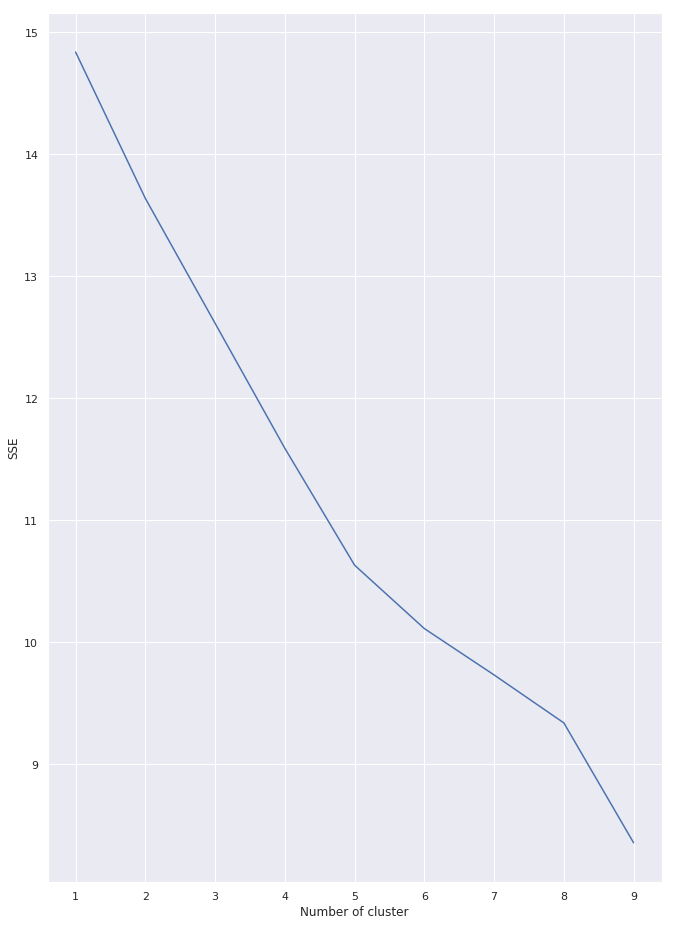

In [37]:
sse = {}
for k in range(1,10):
    kmeans = KMeans(n_clusters=k,random_state=0)
    kmeans.fit(mumbai_venues_grouped.drop('Neighborhood',axis=1))
    mumbai_venues_grouped['Cluster'] = kmeans.labels_
    sse[k] = kmeans.inertia_

plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

#From the above graph, we can see the optimal value for cluster is 5.

In [38]:
kmeans = KMeans(n_clusters=5,random_state=0)

In [39]:
kmeans.fit(mumbai_venues_grouped.drop('Neighborhood',axis=1))

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [40]:
mumbai_venues_grouped['Cluster'] = kmeans.labels_

In [41]:
mumbai_venues_grouped.groupby('Cluster')['Neighborhood'].count()

Cluster
0    40
1     5
2    29
3     2
4    10
Name: Neighborhood, dtype: int64

In [42]:
mumbai_venues_grouped.columns

Index(['Neighborhood', 'Venue Category_ATM',
       'Venue Category_Afghan Restaurant',
       'Venue Category_American Restaurant', 'Venue Category_Amphitheater',
       'Venue Category_Antique Shop', 'Venue Category_Arcade',
       'Venue Category_Art Gallery', 'Venue Category_Arts & Crafts Store',
       'Venue Category_Arts & Entertainment',
       ...
       'Venue Category_Tourist Information Center', 'Venue Category_Trail',
       'Venue Category_Train Station',
       'Venue Category_Vegetarian / Vegan Restaurant',
       'Venue Category_Whisky Bar', 'Venue Category_Wine Bar',
       'Venue Category_Wine Shop', 'Venue Category_Women's Store',
       'Venue Category_Yoga Studio', 'Cluster'],
      dtype='object', length=172)

In [43]:
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(mumbai_venues_grouped,on='Neighborhood')

In [44]:
neighborhoods_venues_sorted.head(4)

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venue Category_Tourist Information Center,Venue Category_Trail,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Agripada,Venue Category_Bakery,Venue Category_Gym,Venue Category_Coffee Shop,Venue Category_Indian Restaurant,Venue Category_Yoga Studio,Venue Category_Fast Food Restaurant,Venue Category_Farmers Market,Venue Category_Falafel Restaurant,Venue Category_Event Space,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,Altamount Road,Venue Category_Café,Venue Category_Coffee Shop,Venue Category_Bakery,Venue Category_Sandwich Place,Venue Category_Pizza Place,Venue Category_Theater,Venue Category_Indian Restaurant,Venue Category_Falafel Restaurant,Venue Category_Event Space,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Amboli,Venue Category_Halal Restaurant,Venue Category_Gym,Venue Category_Park,Venue Category_Sandwich Place,Venue Category_Coffee Shop,Venue Category_Ice Cream Shop,Venue Category_Asian Restaurant,Venue Category_Indian Restaurant,Venue Category_Fast Food Restaurant,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,Amrut Nagar,Venue Category_Indian Restaurant,Venue Category_Café,Venue Category_Asian Restaurant,Venue Category_Electronics Store,Venue Category_Fast Food Restaurant,Venue Category_Restaurant,Venue Category_Italian Restaurant,Venue Category_Sandwich Place,Venue Category_Bowling Alley,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [45]:
neighborhoods_venues_sorted.columns
neighborhoods_venues_sorted = neighborhoods_venues_sorted.merge(mumbai_venues,on='Neighborhood')

In [46]:
# create map
map_clusters = folium.Map(location=[mumbai_latitude, mumbai_longitude], zoom_start=11)

In [47]:
# set color scheme for the clusters
x = np.arange(6)
ys = [i + x + (i*x)**2 for i in range(6)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(neighborhoods_venues_sorted['Neighborhood Latitude'], neighborhoods_venues_sorted['Neighborhood Longitude'], neighborhoods_venues_sorted['Neighborhood'], neighborhoods_venues_sorted['Cluster']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)

In [48]:
map_clusters

# Finding similar locations based on user input (recommending location)

## We need to analyze factors such as population and Income to recommend.

In [49]:
mumbai_income.head()

,Borough,Neighborhoods,AverageIncome
0,Western,Amboli,18944.099792
1,Western,"Chakala, Andheri",56837.022198
2,Western,D.N. Nagar,41991.817435
3,Western,Four Bungalows,6667.447632
4,Western,Lokhandwala,53270.063892


In [50]:
mumbai_population.head()

,Borough,Neighborhoods,Population
0,Western,Amboli,348903.618242
1,Western,"Chakala, Andheri",299292.668696
2,Western,D.N. Nagar,191003.625665
3,Western,Four Bungalows,212583.146339
4,Western,Lokhandwala,359878.426443


In [51]:
mumbai_population['Normalized_population'] = mumbai_population['Population']/mumbai_population['Population'].max(axis=0)
mumbai_population.head()

,Borough,Neighborhoods,Population,Normalized_population
0,Western,Amboli,348903.618242,0.880810
1,Western,"Chakala, Andheri",299292.668696,0.755567
2,Western,D.N. Nagar,191003.625665,0.482190
3,Western,Four Bungalows,212583.146339,0.536668
4,Western,Lokhandwala,359878.426443,0.908516


In [52]:
mumbai_income['Normalized_income'] = mumbai_income['AverageIncome']/mumbai_income['AverageIncome'].max(axis=0)
mumbai_income.head()

,Borough,Neighborhoods,AverageIncome,Normalized_income
0,Western,Amboli,18944.099792,0.293051
1,Western,"Chakala, Andheri",56837.022198,0.879225
2,Western,D.N. Nagar,41991.817435,0.649581
3,Western,Four Bungalows,6667.447632,0.103140
4,Western,Lokhandwala,53270.063892,0.824047


In [53]:
mumbai_venues_grouped.head(10)

,Neighborhood,Venue Category_ATM,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Amphitheater,Venue Category_Antique Shop,Venue Category_Arcade,Venue Category_Art Gallery,Venue Category_Arts & Crafts Store,Venue Category_Arts & Entertainment,...,Venue Category_Tourist Information Center,Venue Category_Trail,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster
0,Agripada,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1,Altamount Road,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,Amboli,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
3,Amrut Nagar,0.0,0.025641,0.025641,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,Asalfa,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
5,Ballard Estate,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
6,Bandstand Promenade,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
7,Bangur Nagar,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
8,Bhandup,0.0,0.000000,0.000000,0.0,0.0,0.1,0.0,0.0,0.0,...,0.0,0.0,0.0,0.1,0.0,0.0,0.0,0.0,0.0,0
9,Bhayandar,0.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


# Recommending Chinese restaurants (Venue Category_Chinese Restaurant)

In [54]:
mumbai_veg = mumbai_venues_onehot.groupby(['Neighborhood']).sum().reset_index()
mumbai_veg.head()

,Neighborhood,Venue Category_ATM,Venue Category_Afghan Restaurant,Venue Category_American Restaurant,Venue Category_Amphitheater,Venue Category_Antique Shop,Venue Category_Arcade,Venue Category_Art Gallery,Venue Category_Arts & Crafts Store,Venue Category_Arts & Entertainment,...,Venue Category_Theater,Venue Category_Tourist Information Center,Venue Category_Trail,Venue Category_Train Station,Venue Category_Vegetarian / Vegan Restaurant,Venue Category_Whisky Bar,Venue Category_Wine Bar,Venue Category_Wine Shop,Venue Category_Women's Store,Venue Category_Yoga Studio
0,Agripada,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Altamount Road,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,Amboli,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Amrut Nagar,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Asalfa,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
mumbai_veg['Venue Category_Vegetarian / Vegan Restaurant'] 

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    0
14    0
15    0
16    0
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
26    1
27    0
28    0
29    0
     ..
56    0
57    0
58    0
59    0
60    2
61    1
62    1
63    0
64    0
65    0
66    0
67    0
68    0
69    0
70    1
71    0
72    0
73    0
74    0
75    2
76    0
77    0
78    0
79    0
80    0
81    0
82    0
83    0
84    0
85    0
Name: Venue Category_Vegetarian / Vegan Restaurant, Length: 86, dtype: uint8

In [56]:
mumbai_veg = mumbai_veg[['Neighborhood','Venue Category_Vegetarian / Vegan Restaurant']]

In [57]:
mumbai_veg.rename(columns={'Venue Category_Vegetarian / Vegan Restaurant':'NumberOfVegRestaurants'},inplace=True)

In [58]:
mumbai_veg.head(10)

,Neighborhood,NumberOfVegRestaurants
0,Agripada,0
1,Altamount Road,0
2,Amboli,0
3,Amrut Nagar,0
4,Asalfa,0
5,Ballard Estate,0
6,Bandstand Promenade,0
7,Bangur Nagar,0
8,Bhandup,1
9,Bhayandar,0


In [59]:
mumbai_veg['NumberOfNonVeganrestaurants'] = 1-(mumbai_veg['NumberOfVegRestaurants']/mumbai_veg['NumberOfVegRestaurants'].max(axis=0))

In [60]:
mumbai_veg.head(10)

,Neighborhood,NumberOfVegRestaurants,NumberOfNonVeganrestaurants
0,Agripada,0,1.0
1,Altamount Road,0,1.0
2,Amboli,0,1.0
3,Amrut Nagar,0,1.0
4,Asalfa,0,1.0
5,Ballard Estate,0,1.0
6,Bandstand Promenade,0,1.0
7,Bangur Nagar,0,1.0
8,Bhandup,1,0.5
9,Bhayandar,0,1.0


In [61]:
mumbai_veg.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

# Building a target neighborhood by providing a sample restaurant : say ' Whitefield '

In [62]:
target_cluster_dataframe = neighborhoods_venues_sorted.loc[neighborhoods_venues_sorted['Neighborhood']=='Whitefield']

In [63]:
target_cluster_dataframe.reset_index()

,index,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,...,Venue Category_Women's Store,Venue Category_Yoga Studio,Cluster,Borough,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category


In [64]:
target_cluster = target_cluster_dataframe.iloc[0].at['Cluster']

IndexError: single positional indexer is out-of-bounds

In [ ]:
target_cluster

In [93]:
print("The target cluster is : ",target_cluster)

NameError: name 'target_cluster' is not defined

In [94]:
possible_neighborhoods = neighborhoods_venues_sorted[neighborhoods_venues_sorted['Cluster']==target_cluster]
possible_neighborhoods.head()

NameError: name 'target_cluster' is not defined

In [95]:
print("There are {} neighborhoods which has similar characteristics to Whitefield.".format(possible_neighborhoods.shape[0]))

NameError: name 'possible_neighborhoods' is not defined

In [96]:
possible_neighborhoods.reset_index().head()

NameError: name 'possible_neighborhoods' is not defined

In [97]:
possible_neighborhoods.rename(columns={'Neighborhood':'Neighborhoods'},inplace=True)

NameError: name 'possible_neighborhoods' is not defined

# Now we need to create ranking by combining population and income factors as well?

In [98]:
possible_neighborhoods = possible_neighborhoods.merge(mumbai_population[['Neighborhoods','Population','Normalized_population']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(mumbai_income[['Neighborhoods','AverageIncome','Normalized_income']],on='Neighborhoods')
possible_neighborhoods = possible_neighborhoods.merge(mumbai_veg[['Neighborhoods','NumberOfVegRestaurants','NumberOfNonVeganrestaurants']],on='Neighborhoods')

NameError: name 'possible_neighborhoods' is not defined

In [99]:
possible_neighborhoods.head()

NameError: name 'possible_neighborhoods' is not defined

In [100]:
possible_neighborhoods['Ranking'] = possible_neighborhoods['Normalized_population'] * 0.5 + possible_neighborhoods['Normalized_income'] * 0.35 + possible_neighborhoods['NumberOfNonVeganrestaurants'] * 0.1
recommended_neighborhoods = possible_neighborhoods.sort_values(by='Ranking',ascending=False)
recommended_neighborhoods.reset_index(inplace=True, drop=True)

NameError: name 'possible_neighborhoods' is not defined

In [101]:
recommended_neighborhoods.head()

NameError: name 'recommended_neighborhoods' is not defined

In [102]:
top3 = recommended_neighborhoods.groupby(['Neighborhoods','1st Most Common Venue','2nd Most Common Venue','3rd Most Common Venue'])['Ranking'].unique()

NameError: name 'recommended_neighborhoods' is not defined

In [103]:
top3_df = pd.DataFrame(top3).reset_index()

NameError: name 'top3' is not defined

In [104]:
top3_df.head(3)

NameError: name 'top3_df' is not defined

## Here, according the data, we see that 'Begur,Hulimavu and kamakshipalya' are top 3 neighborhoods to find similar food to whitefield restaurant's veg food !

###Here our model will recommend these neighborneeds and top 3 common venues to visit.

## Thank you for reviewing !